In [146]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import shutil
import PIL
import PIL.Image
from sklearn.model_selection import train_test_split
import keras
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
from google.colab import files

In [169]:
'''
load data with ImageDataGenerator from Keras
'''
# TODO: fix
# sizes of data splits 
n_training = 32
n_validation = 16
n_testing = 16

Found 32 images belonging to 3 classes.
Found 32 images belonging to 3 classes.
Found 0 images belonging to 0 classes.
labels = {'.ipynb_checkpoints': 0, 'normal': 1, 'pneumonia': 2}
TrainGen print: <keras.preprocessing.image.DirectoryIterator object at 0x7f67146c1a50>
(16, 256, 256, 3)
(256, 256, 3)


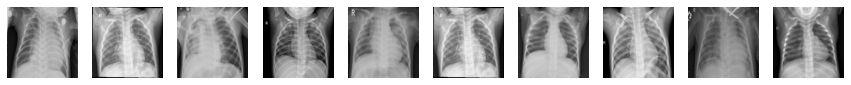

In [183]:
# initialize data generator
datagen = ImageDataGenerator(
    rotation_range=(0), # rotation between (-5,5) degrees
    width_shift_range=0.00, # shifting between (-5,5) %
    height_shift_range=0.00, # same for vertical shifts
    zoom_range=0.00, # random zooms of (-5,5) %
    brightness_range=[1,1] # adjusts brightness between (-20,20) %
)

# directories
homedir = '/content/projectData'
traindir = homedir + '/training'
valdir = homedir + '/validation'
testdir = homedir + '/testing'

# initialize data generators
batch_size=16

traingen = datagen.flow_from_directory(
        directory = traindir,
        batch_size = batch_size,
        class_mode = 'binary',
        shuffle = True,
        seed = 1337
)

valgen = datagen.flow_from_directory(
        directory = valdir,
        batch_size = batch_size,
        class_mode = 'binary',
        shuffle = True,
        seed = 1337
)

testgen = datagen.flow_from_directory(
        directory = testdir,
        batch_size = 1,
        class_mode = None,
        shuffle = False,
        seed = 1337
)

# save labels
labels = (traingen.class_indices)

######  PLOTTING STUFF FOR DEBUG  ###########
print("labels =",labels)
print("TrainGen print:",traingen)
#print("Labels print:",traingen.class_indices.keys())
#print(traingen.labels) # prints the labels (1,2) of ALL the images in dataset

iters = 10 # number of images to be plotted
fig, ax = plt.subplots(nrows=1, ncols=iters, figsize=(15,15))
for i in range(iters):
  image = next(traingen)[0].astype('uint8')
  
  #DEBUGGING
  if i ==0:
    print(image.shape)
    #print(image)

  # reshaping image for plot
  image.resize((1,256,256,3))  
  image = np.squeeze(image)

  #DEBUGGING
  if i==0:
    print(image.shape)
  
  # print image
  ax[i].imshow(image)
  ax[i].axis('off')
  
  # print i'th images label / index
  # print("index is:",0)


In [182]:
# define step sizes by total amount of entries in training set and batch sizes
train_stepsize = n_training // batch_size
valid_stepsize = n_validation // batch_size
test_stepsize = n_testing // batch_size

# creating model Object
model = tf.keras.Sequential()

from tensorflow.keras import layers
from tensorflow.keras import optimizers

# adding layers to model
model.add(layers.Dense(32, activation='relu', input_shape=(256,256,3)))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(2, activation='sigmoid'))

# compiling model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# fitting model
model.fit_generator(generator=traingen,
                    steps_per_epoch=train_stepsize,
                    validation_data=valgen,
                    validation_steps=valid_stepsize,
                    epochs=10
                    )

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.


Epoch 1/10


ValueError: ignored

In [ ]:
# evaluate the model
model.evaluate_generator(
    generator=valgen,
    steps=valid_stepsize
)

In [ ]:
#https://vijayabhaskar96.medium.com/tutorial-image-classification-with-keras-flow-from-directory-and-generators-95f75ebe5720